In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from utils import *
from scipy.optimize import curve_fit

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100

In [10]:
df = pd.read_csv('h2a.csv')
df.head()
df = df.loc[5500:39000]
df = convert_time_to_seconds(df, 'Time')

In [11]:
# Calibrate Thermistor
calibration_df = df
term_coeff = get_steinhart_hart_coefficents(calibration_df)
print('Thermistor Coefficents',term_coeff)
df['Temperature_1 (Thermistor)'] = get_thermistor_temperatures(df,term_coeff)


Thermistor Coefficents [ 0.0263875  -0.08052788  0.08306023]


In [12]:
# Calibrate IC Sensor
calibration_df = df
ic_coeff = get_IC_coefficents(calibration_df)
print(ic_coeff)

df['Temperature_2 (IC Sensor)'] = get_IC_temperatures(df,ic_coeff)

[ 22.44600177 -29.32553334]


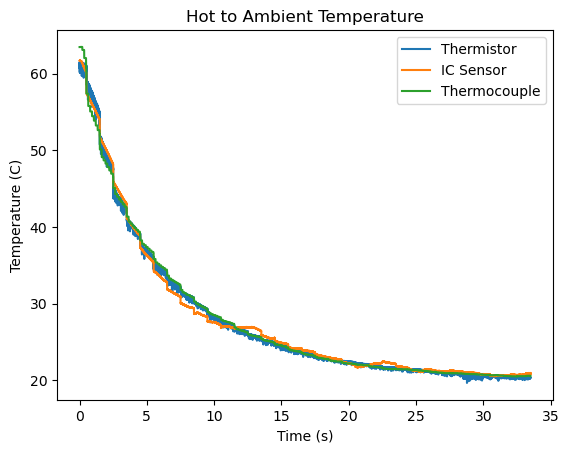

In [13]:
# Calculate Temperature from IC voltage
sub_df = df

plt.plot(sub_df['Time'],sub_df['Temperature_1 (Thermistor)'], label = 'Thermistor', alpha = 1.0)
plt.plot(sub_df['Time'],sub_df['Temperature_2 (IC Sensor)'], label = 'IC Sensor', alpha = 1.0)
plt.plot(sub_df['Time'], sub_df['Temperature_0 (Collected)'], label = 'Thermocouple', alpha = 1.0)


plt.title('Hot to Ambient Temperature')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Temperature (C)')

plt.show()

The time constant is: 5.8500


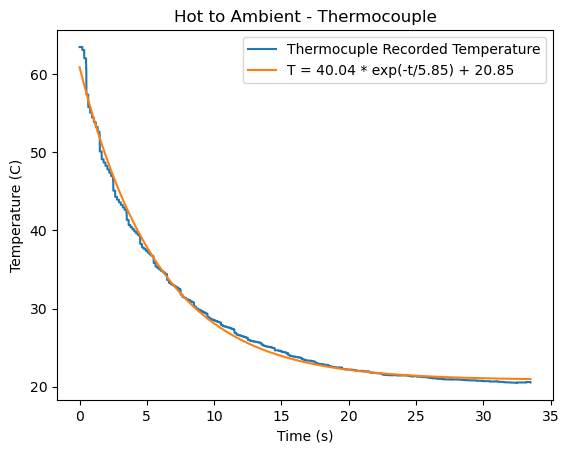

In [14]:
# calculate time constants
# Thermocouple Time Constant
time = 'Time'
thermcouple_temp = 'Temperature_0 (Collected)'
a,tau,b = get_expoential_coefficents(sub_df, time, thermcouple_temp, initial_guess=[40,6,20])
print(f'The time constant is: {tau:.4f}')

# visualize
plt.plot(df['Time'],df[thermcouple_temp], label = 'Thermocuple Recorded Temperature')
plt.plot(df['Time'], [exponential_equation(t, a, tau,b ) for t in df['Time']], label = f"T = {a:.2f} * exp(-t/{tau:.2f}) + {b:.2f}")
plt.title('Hot to Ambient - Thermocouple')
plt.xlabel('Time (s)')
plt.ylabel('Temperature (C)')
plt.legend()

plt.show()

The time constant is: 5.6107


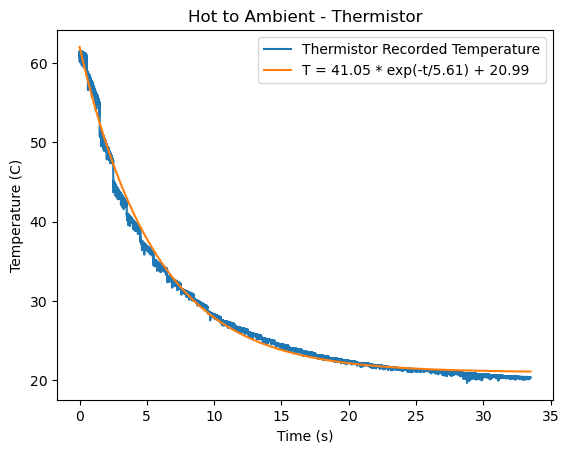

In [15]:
# Thermistor Time Constant
time = 'Time'
thermistor_temp = 'Temperature_1 (Thermistor)'
a,tau,b = get_expoential_coefficents(sub_df, time, thermistor_temp, initial_guess=[40,6,20])
print(f'The time constant is: {tau:.4f}')

# visualize
plt.plot(df['Time'],df[thermistor_temp], label = 'Thermistor Recorded Temperature')
plt.plot(df['Time'], [exponential_equation(t, a, tau,b ) for t in df['Time']], label = f"T = {a:.2f} * exp(-t/{tau:.2f}) + {b:.2f}")
plt.title('Hot to Ambient - Thermistor')
plt.xlabel('Time (s)')
plt.ylabel('Temperature (C)')
plt.legend()

plt.show()

The time constant is: 5.3174


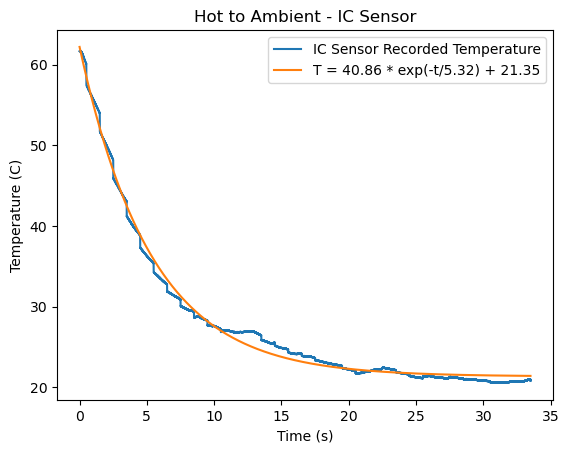

In [16]:
# IC Time Constant
time = 'Time'
ic_temp = 'Temperature_2 (IC Sensor)'
a,tau,b = get_expoential_coefficents(sub_df, time, ic_temp, initial_guess=[40,6,20])
print(f'The time constant is: {tau:.4f}')

# visualize
plt.plot(df['Time'],df[ic_temp], label = 'IC Sensor Recorded Temperature')
plt.plot(df['Time'], [exponential_equation(t, a, tau,b ) for t in df['Time']], label = f"T = {a:.2f} * exp(-t/{tau:.2f}) + {b:.2f}")
plt.title('Hot to Ambient - IC Sensor')
plt.xlabel('Time (s)')
plt.ylabel('Temperature (C)')
plt.legend()

plt.show()